In [198]:
import matplotlib.pyplot as plt
import numpy as np

def parse_datafile(fname):
    with open(fname) as f:
        raw = f.read().split()
        n = 28 ** 2
        data = np.array([raw[i:i + n] for i in range(0, len(raw), n)], dtype=float)
    return data


def parse_labelfile(fname):
    with open(fname) as f:
        labels = np.array(f.read().split(), dtype=int)
    return labels

tr_dt=parse_datafile('MNIST-Train-cropped.txt')
tr_lb=parse_labelfile('MNIST-Train-Labels-cropped.txt')
print("tr finish!")

tr finish!


In [199]:
'''
#The code below is trying to plot the heatmap outlook of each 28*28 figure, but it is not finished.
def parse_28_data(data_in):
    n=28
    data_middle=np.matrix([data_in[i:i+n] for i in range(0, len(data_in), n)], dtype=float)
    data=np.matrix(np.arange(len(data_in)))
    for i in range(len(data_middle)):
        for j in range(28):
            data[j]=data_middle[i:i+n]
    return data

tr_dt_28=parse_28_data(tr_dt)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(tr_dt_28[0], cmap=plt.cm.hot_r)
plt.colorbar(im)
plt.title("This is a title", fontproperties=font)
plt.show()
'''

'\n#The code below is trying to plot the heatmap outlook of each 28*28 figure, but it is not finished.\ndef parse_28_data(data_in):\n    n=28\n    data_middle=np.matrix([data_in[i:i+n] for i in range(0, len(data_in), n)], dtype=float)\n    data=np.matrix(np.arange(len(data_in)))\n    for i in range(len(data_middle)):\n        for j in range(28):\n            data[j]=data_middle[i:i+n]\n    return data\n\ntr_dt_28=parse_28_data(tr_dt)\n\nfig = plt.figure()\nax = fig.add_subplot(111)\nim = ax.imshow(tr_dt_28[0], cmap=plt.cm.hot_r)\nplt.colorbar(im)\nplt.title("This is a title", fontproperties=font)\nplt.show()\n'

In [221]:
ts_dt=parse_datafile('MNIST-Test-cropped.txt')
ts_lb=parse_labelfile('MNIST-Test-Labels-cropped.txt')
def knn(k,ts_x,tr_x,label):
    squre_dist=np.square(ts_x-tr_x)
    #this is square Euclidean distance
    total_dist=np.sqrt(squre_dist.sum(axis=1))
    #this is the total distance (add up all 784 units) from test element to each training element
    sort_dist=total_dist.argsort(axis=0)
    #sort the total distance from nearest to farest
    tr_lb_stats={}
    for i in range(k):
        lb=label[sort_dist[i]] #find the element label from the training label set
        tr_lb_stats[lb]=tr_lb_stats.get(lb,0)+1
        #add count to the label that have been found in k distance, store the count just in position "lb"
    ts_predict_lb=sorted(tr_lb_stats.items(),key=lambda d:d[1],reverse=True) #find the label that with highest count
    return ts_predict_lb[0][0]


def seg(dt,lb,char):
    seg_dt=[]
    for i in range(lb.shape[0]):
        if(lb[i]==char):
            seg_dt.append(dt[i])
    seg_dt=np.array(seg_dt)
    return seg_dt

In [247]:
ts5=seg(ts_dt,ts_lb,5)
ts5_lb=5
ts6=seg(ts_dt,ts_lb,6)
ts6_lb=6
ts56=np.vstack((ts5,ts6))

print(ts56.shape)

rate56=[]
for K in range(1,34,2): #k range from 1 to 33
    lb=[]
    for i in range(ts56.shape[0]):
        lb.append(knn(K,ts56[i],tr_dt,tr_lb)) #predicted label calculated from knn
    lb=np.array(lb) #change predicted label to array, so that it can compare with test set label
    rate56.append(1-np.mean(lb[0:ts5.shape[0]]!=ts5_lb)-np.mean(lb[ts5.shape[0]:ts56.shape[0]]!=ts6_lb)) #when label same, count the rate
    print(rate56)


(357, 784)
[0.8712886824430356]
[0.8712886824430356, 0.8936978218567573]
[0.8712886824430356, 0.8936978218567573, 0.8936350511581194]
[0.8712886824430356, 0.8936978218567573, 0.8936350511581194, 0.8824932521498965]
[0.8712886824430356, 0.8936978218567573, 0.8936350511581194, 0.8824932521498965, 0.8824618668005775]
[0.8712886824430356, 0.8936978218567573, 0.8936350511581194, 0.8824932521498965, 0.8824618668005775, 0.8824618668005775]
[0.8712886824430356, 0.8936978218567573, 0.8936350511581194, 0.8824932521498965, 0.8824618668005775, 0.8824618668005775, 0.8601154980854937]
[0.8712886824430356, 0.8936978218567573, 0.8936350511581194, 0.8824932521498965, 0.8824618668005775, 0.8824618668005775, 0.8601154980854937, 0.8545289059067227]
[0.8712886824430356, 0.8936978218567573, 0.8936350511581194, 0.8824932521498965, 0.8824618668005775, 0.8824618668005775, 0.8601154980854937, 0.8545289059067227, 0.8545602912560417]
[0.8712886824430356, 0.8936978218567573, 0.8936350511581194, 0.8824932521498965,

In [248]:
ts5=seg(tr_dt[8000:10000],tr_lb[8000:10000],5)
ts6=seg(tr_dt[8000:10000],tr_lb[8000:10000],6)
ts56=np.vstack((ts5,ts6))

valid_rate56=[]
for K in range(1,34,2): #k range from 1 to 33
    lb=[]
    for i in range(ts56.shape[0]):
        lb.append(knn(K,ts56[i],tr_dt[0:8000],tr_lb[0:8000])) #predicted label calculated from knn
    lb=np.array(lb) #change predicted label to array, so that it can compare with test set label
    valid_rate56.append(1-np.mean(lb[0:ts5.shape[0]]!=ts5_lb)-np.mean(lb[ts5.shape[0]:ts56.shape[0]]!=ts6_lb)) #when label same, count the rate
    print(valid_rate56)

[0.9147400506096158]
[0.9147400506096158, 0.9069473199907983]
[0.9147400506096158, 0.9069473199907983, 0.9101104209799862]
[0.9147400506096158, 0.9069473199907983, 0.9101104209799862, 0.896106510236945]
[0.9147400506096158, 0.9069473199907983, 0.9101104209799862, 0.896106510236945, 0.9023176903611686]
[0.9147400506096158, 0.9069473199907983, 0.9101104209799862, 0.896106510236945, 0.9023176903611686, 0.897688060731539]
[0.9147400506096158, 0.9069473199907983, 0.9101104209799862, 0.896106510236945, 0.9023176903611686, 0.897688060731539, 0.8914768806073153]
[0.9147400506096158, 0.9069473199907983, 0.9101104209799862, 0.896106510236945, 0.9023176903611686, 0.897688060731539, 0.8914768806073153, 0.8790545203588682]
[0.9147400506096158, 0.9069473199907983, 0.9101104209799862, 0.896106510236945, 0.9023176903611686, 0.897688060731539, 0.8914768806073153, 0.8790545203588682, 0.8868472509776857]
[0.9147400506096158, 0.9069473199907983, 0.9101104209799862, 0.896106510236945, 0.9023176903611686, 0

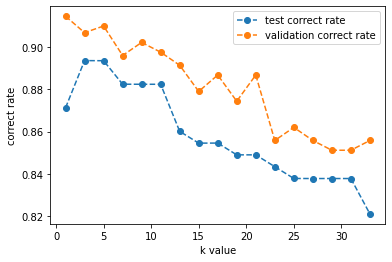

In [249]:
fig, ax = plt.subplots()
x=np.array(np.arange(1,34,2))
y1=rate56
y2=valid_rate56
ax.plot(x,y1,'o--',label='test correct rate')
ax.plot(x,y2,'o--',label='validation correct rate')
ax.set_xlabel('k value')
ax.set_ylabel('correct rate')
ax.legend()

fig.savefig('Assignment1Question4Plot1.pdf')

In [239]:
ts0=seg(ts_dt,ts_lb,0)
ts0_lb=0
ts8=seg(ts_dt,ts_lb,8)
ts8_lb=8
ts08=np.vstack((ts0,ts8))

ts1=seg(ts_dt,ts_lb,1)
ts1_lb=1
print(ts0.shape)
print(ts8.shape)
print(ts08.shape)

rate08=[]
for K in range(1,34,2): #k range from 1 to 33
    lb=[]
    for i in range(ts08.shape[0]):
        lb.append(knn(K,ts08[i],tr_dt,tr_lb)) #predicted label calculated from knn
    lb=np.array(lb) #change predicted label to array, so that it can compare with test set label
    rate08.append(1-np.mean(lb[0:ts0.shape[0]]!=ts0_lb)-np.mean(lb[ts0.shape[0]:ts08.shape[0]]!=ts8_lb)) #when label same, count the rate
    print(rate08)

(175, 784)
(234, 784)
(192, 784)
[0.828125]
[0.828125, 0.8177083333333334]
[0.828125, 0.8177083333333334, 0.8276190476190477]
[0.828125, 0.8177083333333334, 0.8276190476190477, 0.832827380952381]
[0.828125, 0.8177083333333334, 0.8276190476190477, 0.832827380952381, 0.8067857142857143]
[0.828125, 0.8177083333333334, 0.8276190476190477, 0.832827380952381, 0.8067857142857143, 0.7963690476190477]
[0.828125, 0.8177083333333334, 0.8276190476190477, 0.832827380952381, 0.8067857142857143, 0.7963690476190477, 0.7802380952380952]
[0.828125, 0.8177083333333334, 0.8276190476190477, 0.832827380952381, 0.8067857142857143, 0.7963690476190477, 0.7802380952380952, 0.7906547619047619]
[0.828125, 0.8177083333333334, 0.8276190476190477, 0.832827380952381, 0.8067857142857143, 0.7963690476190477, 0.7802380952380952, 0.7906547619047619, 0.7963690476190477]
[0.828125, 0.8177083333333334, 0.8276190476190477, 0.832827380952381, 0.8067857142857143, 0.7963690476190477, 0.7802380952380952, 0.7906547619047619, 0.79

[0.777156508920856]
[0.777156508920856, 0.8029532862298582]
[0.777156508920856, 0.8029532862298582, 0.7969552178112134]
[0.777156508920856, 0.8029532862298582, 0.7969552178112134, 0.7655416052457683]
[0.777156508920856, 0.8029532862298582, 0.7969552178112134, 0.7655416052457683, 0.77601280943425]
[0.777156508920856, 0.8029532862298582, 0.7969552178112134, 0.7655416052457683, 0.77601280943425, 0.7808671783662888]
[0.777156508920856, 0.8029532862298582, 0.7969552178112134, 0.7655416052457683, 0.77601280943425, 0.7808671783662888, 0.7397448279367661]
[0.777156508920856, 0.8029532862298582, 0.7969552178112134, 0.7655416052457683, 0.77601280943425, 0.7808671783662888, 0.7397448279367661, 0.7345092258425253]
[0.777156508920856, 0.8029532862298582, 0.7969552178112134, 0.7655416052457683, 0.77601280943425, 0.7808671783662888, 0.7397448279367661, 0.7345092258425253, 0.7236567884918417]
[0.777156508920856, 0.8029532862298582, 0.7969552178112134, 0.7655416052457683, 0.77601280943425, 0.7808671783

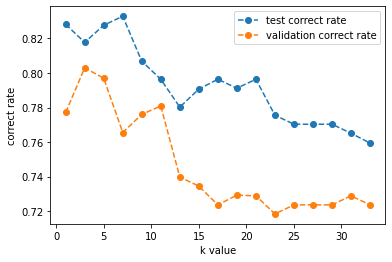

In [243]:
ts0=seg(tr_dt[8000:10000],tr_lb[8000:10000],0)
ts8=seg(tr_dt[8000:10000],tr_lb[8000:10000],8)
ts08=np.vstack((ts0,ts8))

valid_rate08=[]
for K in range(1,34,2): #k range from 1 to 33
    lb=[]
    for i in range(ts08.shape[0]):
        lb.append(knn(K,ts08[i],tr_dt[0:8000],tr_lb[0:8000])) #predicted label calculated from knn
    lb=np.array(lb) #change predicted label to array, so that it can compare with test set label
    valid_rate08.append(1-np.mean(lb[0:ts0.shape[0]]!=ts0_lb)-np.mean(lb[ts0.shape[0]:ts08.shape[0]]!=ts8_lb)) #when label same, count the rate
    print(valid_rate08)

fig, ax = plt.subplots()
x=np.array(np.arange(1,34,2))
y1=rate08
y2=valid_rate08
ax.plot(x,y1,'o--',label='test correct rate')
ax.plot(x,y2,'o--',label='validation correct rate')
ax.set_xlabel('k value')
ax.set_ylabel('correct rate')
ax.legend()
fig.savefig('Assignment1Question4Plot2.pdf')

(175, 784)
(234, 784)
(409, 784)
[0.9957264957264957]
[0.9957264957264957, 1.0]
[0.9957264957264957, 1.0, 0.9942857142857143]
[0.9957264957264957, 1.0, 0.9942857142857143, 0.9942857142857143]
[0.9957264957264957, 1.0, 0.9942857142857143, 0.9942857142857143, 0.9942857142857143]
[0.9957264957264957, 1.0, 0.9942857142857143, 0.9942857142857143, 0.9942857142857143, 0.9942857142857143]
[0.9957264957264957, 1.0, 0.9942857142857143, 0.9942857142857143, 0.9942857142857143, 0.9942857142857143, 0.9885714285714285]
[0.9957264957264957, 1.0, 0.9942857142857143, 0.9942857142857143, 0.9942857142857143, 0.9942857142857143, 0.9885714285714285, 0.9885714285714285]
[0.9957264957264957, 1.0, 0.9942857142857143, 0.9942857142857143, 0.9942857142857143, 0.9942857142857143, 0.9885714285714285, 0.9885714285714285, 0.9942857142857143]
[0.9957264957264957, 1.0, 0.9942857142857143, 0.9942857142857143, 0.9942857142857143, 0.9942857142857143, 0.9885714285714285, 0.9885714285714285, 0.9942857142857143, 0.9942857142

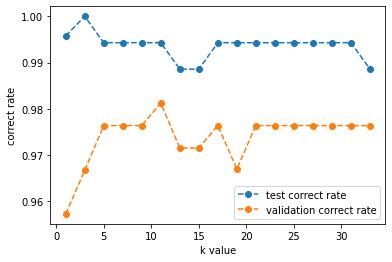

In [245]:
ts0=seg(ts_dt,ts_lb,0)
ts0_lb=0
ts1=seg(ts_dt,ts_lb,1)
ts1_lb=1
ts01=np.vstack((ts0,ts1))
print(ts0.shape)
print(ts1.shape)
print(ts01.shape)

rate01=[]
for K in range(1,34,2): #k range from 1 to 33
    lb=[]
    for i in range(ts01.shape[0]):
        lb.append(knn(K,ts01[i],tr_dt,tr_lb)) #predicted label calculated from knn
    lb=np.array(lb) #change predicted label to array, so that it can compare with test set label
    rate01.append(1-np.mean(lb[0:ts0.shape[0]]!=ts0_lb)-np.mean(lb[ts0.shape[0]:ts01.shape[0]]!=ts1_lb)) #when label same, count the rate
    print(rate01)

ts0=seg(tr_dt[8000:10000],tr_lb[8000:10000],0)
ts1=seg(tr_dt[8000:10000],tr_lb[8000:10000],1)
ts01=np.vstack((ts0,ts1))

valid_rate01=[]
for K in range(1,34,2): #k range from 1 to 33
    lb=[]
    for i in range(ts01.shape[0]):
        lb.append(knn(K,ts01[i],tr_dt[0:8000],tr_lb[0:8000])) #predicted label calculated from knn
    lb=np.array(lb) #change predicted label to array, so that it can compare with test set label
    valid_rate01.append(1-np.mean(lb[0:ts0.shape[0]]!=ts0_lb)-np.mean(lb[ts0.shape[0]:ts01.shape[0]]!=ts1_lb)) #when label same, count the rate
    print(valid_rate01)

fig, ax = plt.subplots()
x=np.array(np.arange(1,34,2))
y1=rate01
y2=valid_rate01
ax.plot(x,y1,'o--',label='test correct rate')
ax.plot(x,y2,'o--',label='validation correct rate')
ax.set_xlabel('k value')
ax.set_ylabel('correct rate')
ax.legend()

In [246]:
fig.savefig('Assignment1Question4Plot3.pdf')